## Import Libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading and Merging

In [66]:
# df1 = pd.read_csv("C:\\Users\\RITVISINGH\\Desktop\\Capstone1_Car Insurance\\InsuranceData\\csv\Policy features.csv")
# df2 = pd.read_csv("C:\\Users\\RITVISINGH\\Desktop\\Capstone1_Car Insurance\\InsuranceData\\csv\\Insurance claim.csv")
df1 = pd.read_csv("Policy features.csv")
df2 = pd.read_csv("Insurance claim.csv")
merge_df = df1.merge(df2, how='inner')

## Data Cleaning

1) Check Dataset Balance

In [67]:
merge_df['is_claim'].value_counts(normalize=True)


is_claim
0    0.936033
1    0.063967
Name: proportion, dtype: float64

2) Check for Duplicates

In [68]:
merge_df.duplicated().sum()

0

Conclusion:
1) is_claim data is imbalanced featuring 93% people claiming No Insurance, 6.3% people claiming insurance
2) There are no duplicates present.

3. Check for missing values

In [69]:
merge_df.isna().sum()

policy_id               0
policy_tenure          20
age_of_car              5
age_of_policyholder     7
area_cluster            6
population_density     12
is_claim                0
dtype: int64

In [70]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58515 non-null  object 
 1   policy_tenure        58495 non-null  float64
 2   age_of_car           58510 non-null  float64
 3   age_of_policyholder  58508 non-null  float64
 4   area_cluster         58509 non-null  object 
 5   population_density   58503 non-null  float64
 6   is_claim             58515 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


4. Handling Missing Values

Strategy:-
1) Policy_id: No missing values - Unique Identifier
2) Policy_tenure: 20 missing values (replace with median) [Continuous Variable], dtype = float64
3) Age_of_car: 5 missing values (replace with median) [Continuous Variable], dtype = float64
4) Age_of_policyholder: 7 missing values (replace with median) [Continuous Variable], dtype = float64
5) Area_cluster: 6 missing values (Categorical Variable: Explained Below)
6) Population_density: 12 missing values (Categorical Variable: Explained Below)
7) Insurance_claim: No missing values

In [72]:
merge_df['policy_tenure'].fillna(merge_df['policy_tenure'].median(),inplace=True)
merge_df['age_of_car'].fillna(merge_df['age_of_car'].median(),inplace=True)
merge_df['age_of_policyholder'].fillna(merge_df['age_of_policyholder'].median(),inplace=True)

5) area_cluster : 6 missing values(Categorical Variable)
6) population_density : 12 missing values(Categorical Variable)

Steps for Handling Missing Values in area_cluster and population_density column:
Area_cluster is an abbreviation for population Density Column
   
1) Generate c_p and p_c dictionaries to map area_cluster to population_density and vice versa using non-missing values.
2) Determine the mode (most frequent value) for population_density and area_cluster columns.
3) Create fill_row to fill missing values in each row, using mode values if both are missing, or dictionaries if one is missing.
4) Use the apply method to execute fill_row across all rows in the DataFrame.
5) Output the DataFrame with all missing population_density and area_cluster values filled accordingly.

In [73]:
def fill_missing_values(df):  
    
    c_p = df.groupby('area_cluster')['population_density'].first().to_dict()
    p_c = df.groupby('population_density')['area_cluster'].first().to_dict()

    
    mode_pop_den = df['population_density'].mode()[0]
    mode_area_cluster = df['area_cluster'].mode()[0]

    def fill_row(row):
        if pd.isna(row['population_density']) and pd.isna(row['area_cluster']):
            row['population_density'] = mode_pop_den
            row['area_cluster'] = mode_area_cluster
        else:
            if pd.isna(row['population_density']):
                row['population_density'] = c_p.get(row['area_cluster'], row['population_density'])
            if pd.isna(row['area_cluster']):
                row['area_cluster'] = p_c.get(row['population_density'], row['area_cluster'])
        return row

    df = df.apply(fill_row, axis=1)

    return df


In [86]:
c_p = merge_df.groupby('area_cluster')['population_density'].first().to_dict()
c_p

{'C1': 4990.0,
 'C10': 73430.0,
 'C11': 6108.0,
 'C12': 34791.0,
 'C13': 5410.0,
 'C14': 7788.0,
 'C15': 290.0,
 'C16': 16206.0,
 'C17': 65567.0,
 'C18': 35036.0,
 'C19': 27742.0,
 'C2': 27003.0,
 'C20': 20905.0,
 'C21': 3264.0,
 'C22': 16733.0,
 'C3': 4076.0,
 'C4': 21622.0,
 'C5': 34738.0,
 'C6': 13051.0,
 'C7': 6112.0,
 'C8': 8794.0,
 'C9': 17804.0}

In [87]:
p_c = merge_df.groupby('population_density')['area_cluster'].first().to_dict()
p_c

{290.0: 'C15',
 3264.0: 'C21',
 4076.0: 'C3',
 4990.0: 'C1',
 5410.0: 'C13',
 6108.0: 'C11',
 6112.0: 'C7',
 7788.0: 'C14',
 8794.0: 'C8',
 13051.0: 'C6',
 16206.0: 'C16',
 16733.0: 'C22',
 17804.0: 'C9',
 20905.0: 'C20',
 21622.0: 'C4',
 27003.0: 'C2',
 27742.0: 'C19',
 34738.0: 'C5',
 34791.0: 'C12',
 35036.0: 'C18',
 65567.0: 'C17',
 73430.0: 'C10'}

In [74]:
merge_df=fill_missing_values(merge_df)

In [75]:
merge_df.isna().sum()

policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
is_claim               0
dtype: int64

5. Outlier Detection

policy_tenure

policy_tenure:
Q1: 0.210301874
Q3: 1.03891587
Lower Bound: -1.0326191200000001
Upper Bound: 2.281836864

Number of outliers in policy_tenure: 0
---------------------


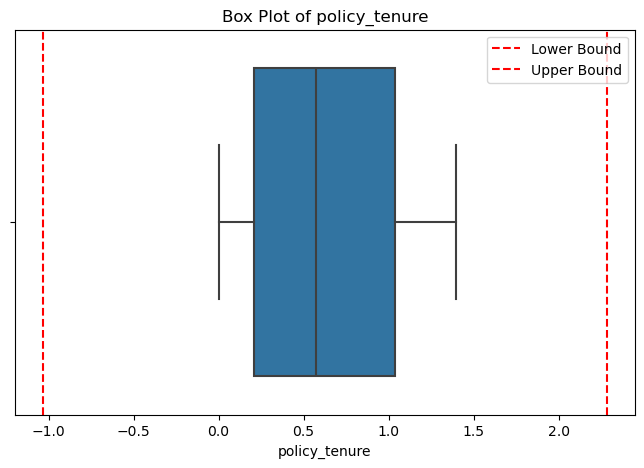

age_of_car

age_of_car:
Q1: 0.02
Q3: 0.11
Lower Bound: -0.115
Upper Bound: 0.245

Number of outliers in age_of_car: 269
---------------------


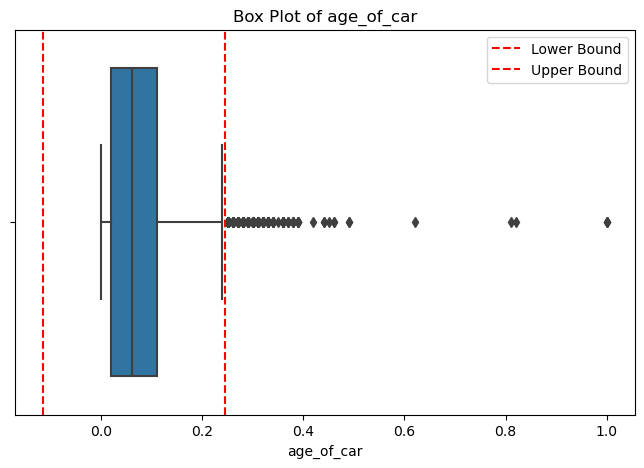

age_of_policyholder

age_of_policyholder:
Q1: 0.365384615
Q3: 0.548076923
Lower Bound: 0.0913461530000001
Upper Bound: 0.8221153849999999

Number of outliers in age_of_policyholder: 221
---------------------


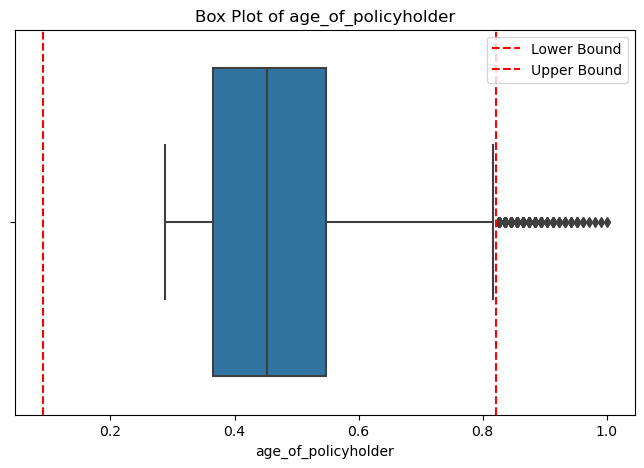

In [77]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    print(f"{column}:\nQ1: {q1}\nQ3: {q3}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}\n")
    print(f"Number of outliers in {column}: {outlier_count}")
    return lower_bound, upper_bound, outliers

numerical_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

for feature in numerical_features:
    print(f"{feature}\n")
    lower_bound, upper_bound, outliers = detect_outliers(merge_df, feature)
    print("---------------------")
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=merge_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()


## Descreptive Statistics

1. First 5 rows

In [78]:
merge_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,0


2. Descreptive Statistic

In [149]:
round(merge_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58515.0,0.61,0.41,0.00,0.21,0.57,1.04,1.4
age_of_car,58515.0,0.07,0.06,0.00,0.02,0.06,0.11,1.0
age_of_policyholder,58515.0,0.47,0.12,0.29,0.37,0.45,0.55,1.0
population_density,58515.0,18829.29,17662.37,290.00,6112.00,8794.00,27003.00,73430.0
is_claim,58515.0,0.06,0.24,0.00,0.00,0.00,0.00,1.0


## Visualize Distribution

1. Numerical Variables Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


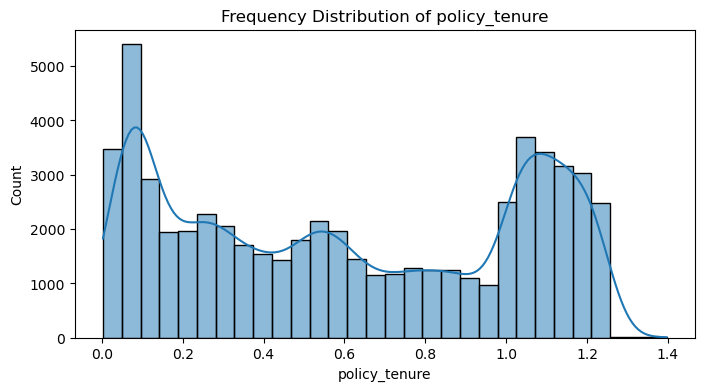

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


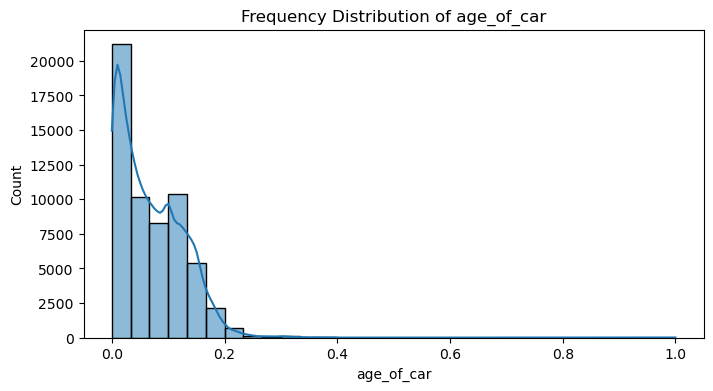

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


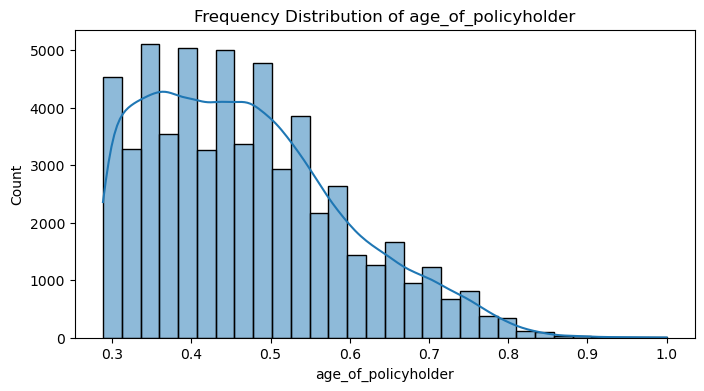

In [95]:
numerical_features = ['policy_tenure','age_of_car','age_of_policyholder']
for i in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(merge_df[i],kde=True, bins=30)
    plt.title(f"Frequency Distribution of {i}")
    plt.show()

2. Categorical Variables Visualization

<Axes: title={'center': 'Frequency Distribution of area_cluster'}, xlabel='area_cluster', ylabel='Count'>

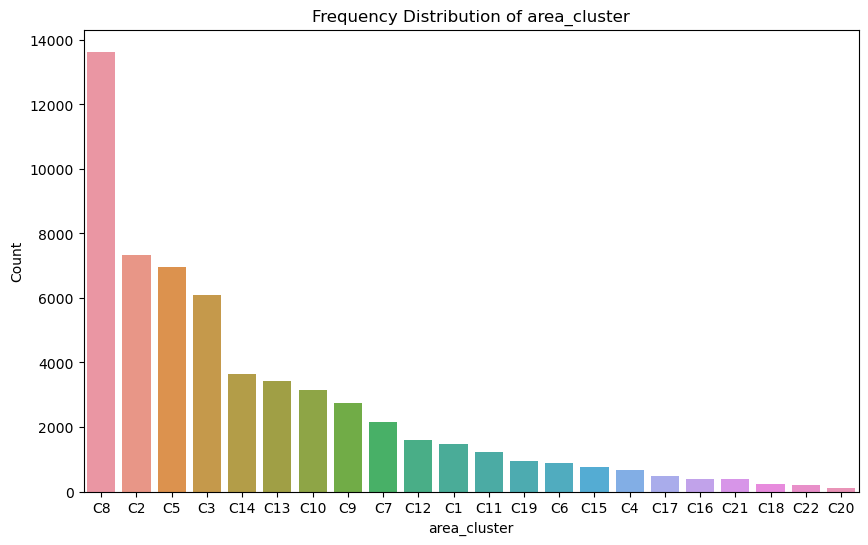

In [158]:
area_claim_counts = merge_df['area_cluster'].value_counts()
plt.figure(figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Area Cluster')
plt.title('Frequency Distribution of area_cluster')
sns.barplot(x=area_claim_counts.index, y=area_claim_counts.values)

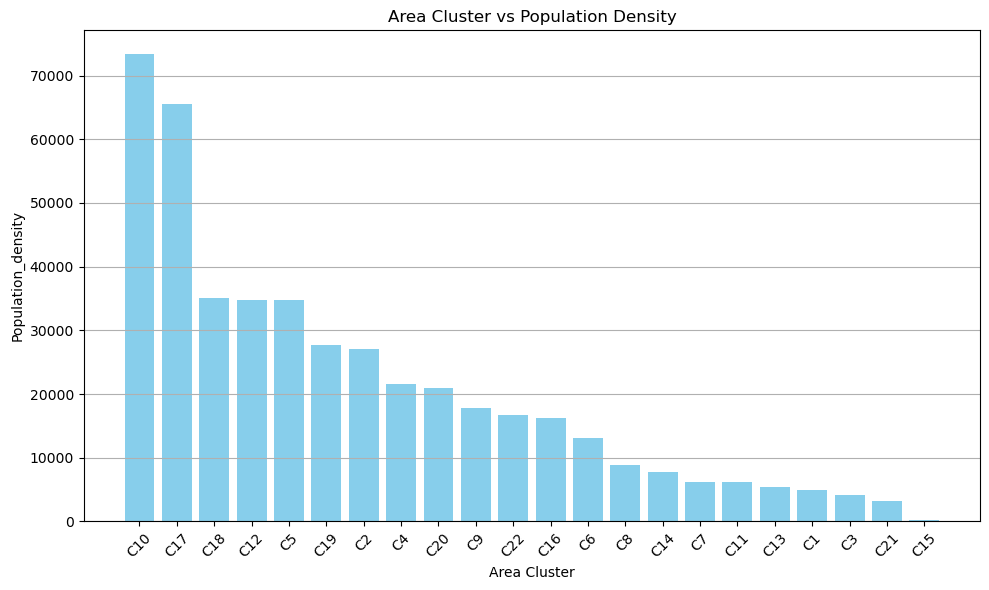

In [102]:
sorted_data = dict(sorted(c_p.items(), key=lambda item: item[1], reverse=True))

x = list(sorted_data.keys())
y = list(sorted_data.values())


plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Area Cluster')
plt.ylabel('Population_density')
plt.title('Area Cluster vs Population Density')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

3. Policy Features vs Is_Claim Replationship

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


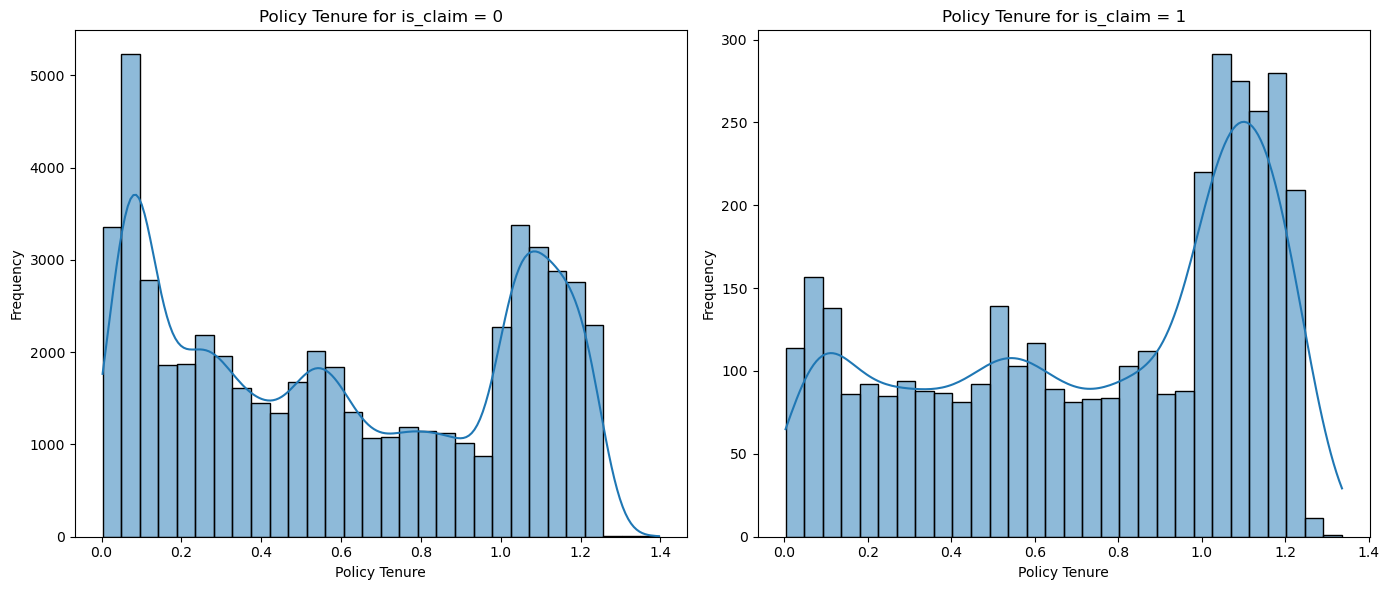

In [104]:
is_claim_0 = merge_df[merge_df['is_claim'] == 0]
is_claim_1 = merge_df[merge_df['is_claim'] == 1]

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(is_claim_0['policy_tenure'], kde=True, bins=30)
plt.title('Policy Tenure for is_claim = 0')
plt.xlabel('Policy Tenure')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(is_claim_1['policy_tenure'], kde=True, bins=30)
plt.title('Policy Tenure for is_claim = 1')
plt.xlabel('Policy Tenure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


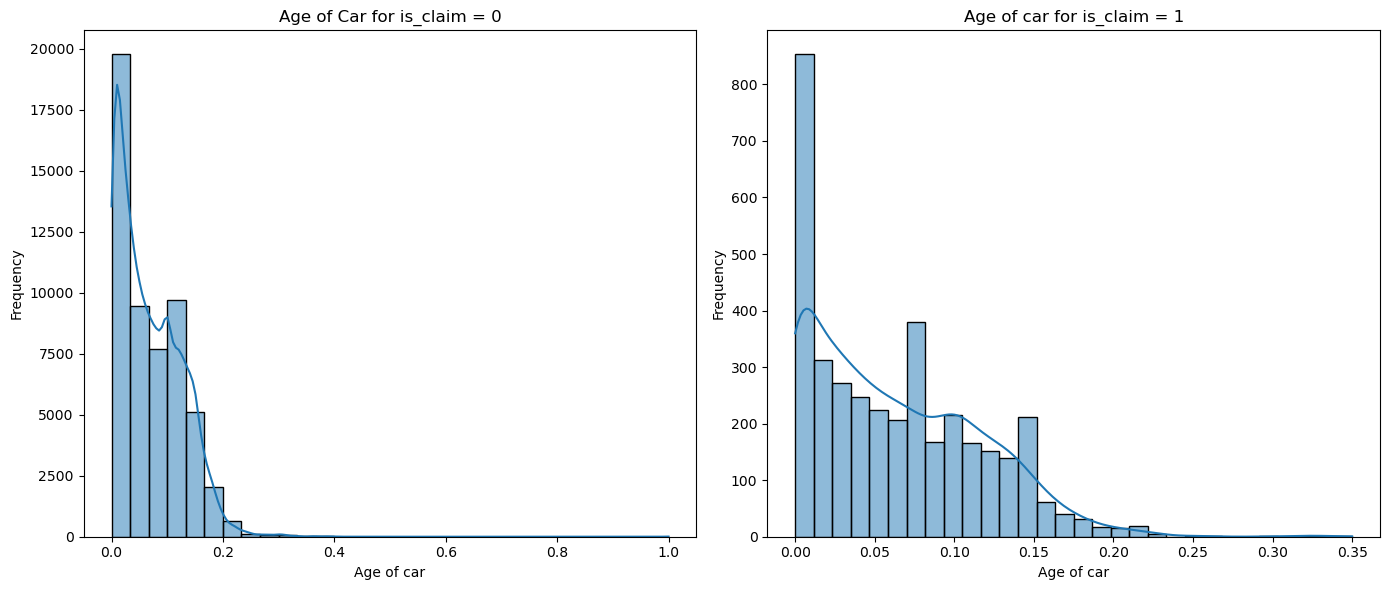

In [105]:
is_claim_0 = merge_df[merge_df['is_claim'] == 0]
is_claim_1 = merge_df[merge_df['is_claim'] == 1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(is_claim_0['age_of_car'], kde=True, bins=30)
plt.title('Age of Car for is_claim = 0')
plt.xlabel('Age of car')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(is_claim_1['age_of_car'], kde=True, bins=30)
plt.title('Age of car for is_claim = 1')
plt.xlabel('Age of car')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


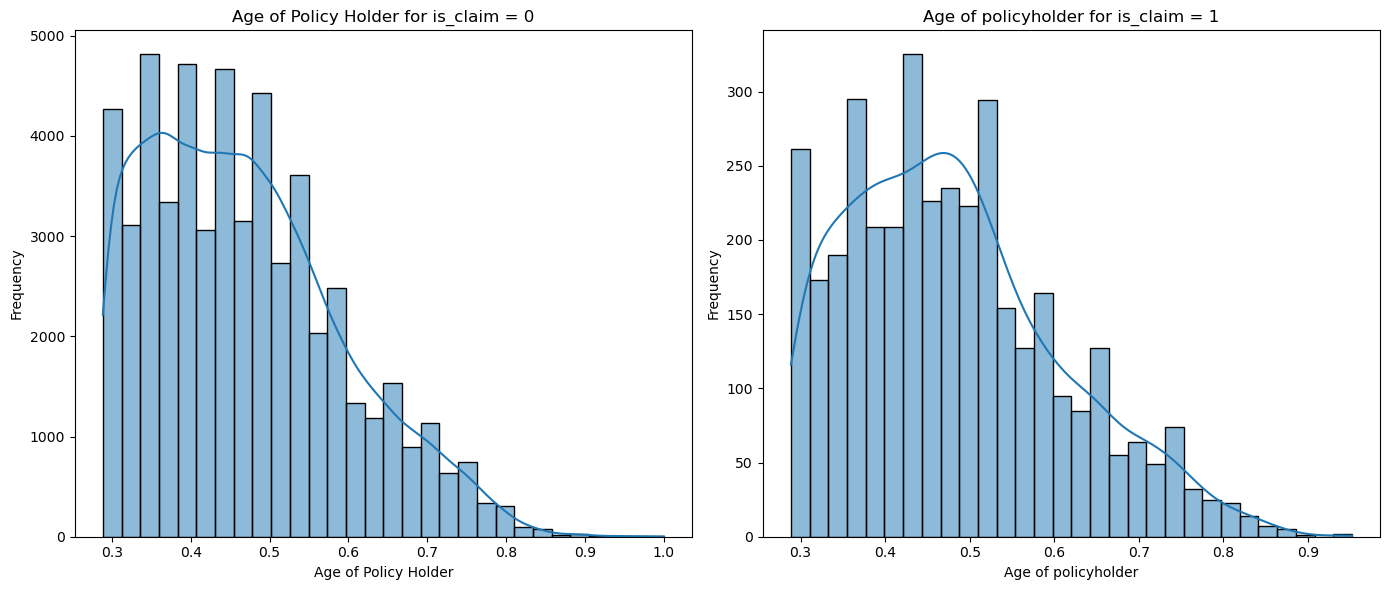

In [106]:
is_claim_0 = merge_df[merge_df['is_claim'] == 0]
is_claim_1 = merge_df[merge_df['is_claim'] == 1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(is_claim_0['age_of_policyholder'], kde=True, bins=30)
plt.title('Age of Policy Holder for is_claim = 0')
plt.xlabel('Age of Policy Holder')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(is_claim_1['age_of_policyholder'], kde=True, bins=30)
plt.title('Age of policyholder for is_claim = 1')
plt.xlabel('Age of policyholder')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [107]:
merge_df.pivot_table(index=['area_cluster','population_density'], columns='is_claim', aggfunc='size',fill_value=0).rename(columns={0:'No Claim',1:'Claim'})


,is_claim,No Claim,Claim
area_cluster,population_density,,
C1,4990.0,1389,75
C10,73430.0,3004,148
C11,6108.0,1139,72
C12,34791.0,1501,86
C13,5410.0,3224,194
C14,7788.0,3371,281
C15,290.0,733,38
C16,16206.0,377,23
C17,65567.0,473,19


AttributeError: 'numpy.int64' object has no attribute 'startswith'

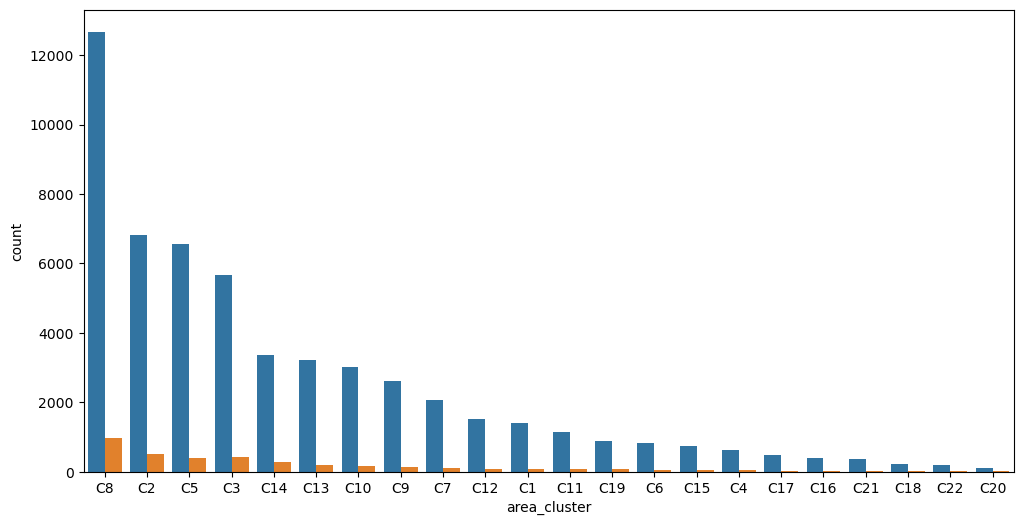

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merge_df, x='area_cluster', hue='is_claim', order=merge_df['area_cluster'].value_counts().index)
plt.show()

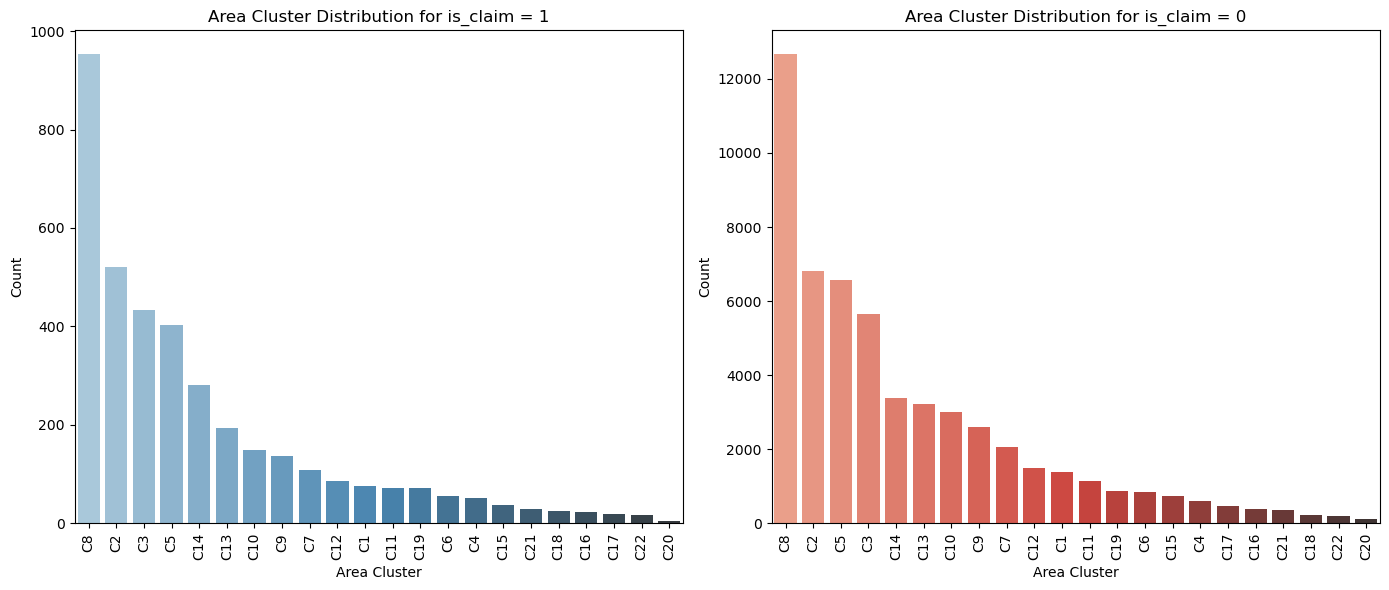

In [109]:
claim_df = merge_df[merge_df['is_claim'] == 1]
no_claim_df = merge_df[merge_df['is_claim'] == 0]


area_claim_counts = claim_df['area_cluster'].value_counts()
area_no_claim_counts = no_claim_df['area_cluster'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=area_claim_counts.index, y=area_claim_counts.values, palette='Blues_d')
plt.title('Area Cluster Distribution for is_claim = 1')
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=area_no_claim_counts.index, y=area_no_claim_counts.values, palette='Reds_d')
plt.title('Area Cluster Distribution for is_claim = 0')
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


4. Establishing Correlation between Numerical Categories

                     policy_tenure  age_of_car  age_of_policyholder
policy_tenure             1.000000    0.166110             0.143547
age_of_car                0.166110    1.000000            -0.035544
age_of_policyholder       0.143547   -0.035544             1.000000


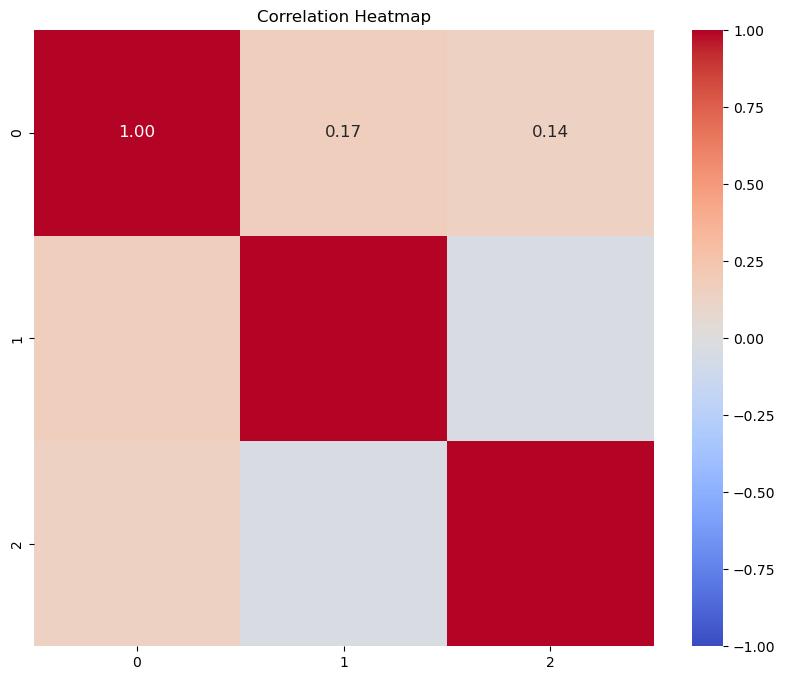

In [112]:
numerical_features = ['policy_tenure','age_of_car','age_of_policyholder']
correlation_matrix = merge_df[numerical_features].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.values, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
            annot_kws={"size": 12}) 
plt.title('Correlation Heatmap')
plt.show()

## Establishing Relationships

In [121]:
merge_claim_0=merge_df.query('is_claim==0')
merge_claim_0

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,0
...,...,...,...,...,...,...,...
58510,ID58511,0.097840,0.10,0.394231,C10,73430.0,0
58511,ID58512,1.038564,0.11,0.480769,C8,8794.0,0
58512,ID58513,0.294251,0.07,0.509615,C10,73430.0,0
58513,ID58514,0.724399,0.06,0.307692,C11,6108.0,0


In [150]:
round(merge_claim_0.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,54772.0,0.60,0.41,0.00,0.20,0.56,1.04,1.4
age_of_car,54772.0,0.07,0.06,0.00,0.02,0.06,0.11,1.0
age_of_policyholder,54772.0,0.47,0.12,0.29,0.37,0.45,0.55,1.0
population_density,54772.0,18912.16,17759.32,290.00,6112.00,8794.00,27003.00,73430.0
is_claim,54772.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [122]:
merge_claim_1=merge_df.query('is_claim==1')
merge_claim_1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
12,ID00013,0.045834,0.03,0.480769,C3,4076.0,1
19,ID00020,0.758623,0.09,0.394231,C5,34738.0,1
21,ID00022,0.527085,0.00,0.615385,C4,21622.0,1
23,ID00024,0.999443,0.08,0.576923,C2,27003.0,1
24,ID00025,0.020563,0.01,0.480769,C8,8794.0,1
...,...,...,...,...,...,...,...
58426,ID58427,0.451904,0.05,0.288462,C2,27003.0,1
58467,ID58468,0.060200,0.12,0.567308,C3,4076.0,1
58473,ID58474,1.180183,0.18,0.471154,C14,7788.0,1
58481,ID58482,1.031958,0.03,0.625000,C3,4076.0,1


In [151]:
round(merge_claim_1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,3743.0,0.74,0.39,0.00,0.40,0.83,1.08,1.34
age_of_car,3743.0,0.06,0.05,0.00,0.02,0.05,0.10,0.35
age_of_policyholder,3743.0,0.48,0.13,0.29,0.38,0.46,0.56,0.95
population_density,3743.0,17616.65,16130.96,290.00,6112.00,8794.00,27003.00,73430.00
is_claim,3743.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


1. Grouping based on (Area_cluster,population density) for is_claim categories

In [134]:
merge_claim_0.groupby(['area_cluster','population_density']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=No'})

,,is_claim=No
area_cluster,population_density,
C8,8794.0,12678
C2,27003.0,6816
C5,34738.0,6568
C3,4076.0,5662
C14,7788.0,3371
C13,5410.0,3224
C10,73430.0,3004
C9,17804.0,2596
C7,6112.0,2056


In [135]:
merge_claim_1.groupby(['area_cluster','population_density']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=Yes'})

,,is_claim=Yes
area_cluster,population_density,
C8,8794.0,954
C2,27003.0,520
C3,4076.0,433
C5,34738.0,402
C14,7788.0,281
C13,5410.0,194
C10,73430.0,148
C9,17804.0,136
C7,6112.0,109


2. Grouping based on Age_of_car for is_claim categories

In [147]:
merge_claim_0.groupby(['age_of_car','area_cluster']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=No'}).head(20)

is_claim=No
age_of_car area_cluster             
0.01       C3                   1063
           C5                    933
0.00       C3                    866
0.10       C8                    774
0.04       C8                    755
0.12       C8                    754
0.03       C8                    731
0.00       C5                    728
0.07       C8                    725
0.05       C8                    723
0.06       C8                    723
0.13       C8                    711
0.09       C8                    707
0.02       C8                    705
           C5                    704
           C3                    704
0.08       C8                    703
0.11       C8                    694
0.01       C2                    683
           C8                    677

In [148]:
merge_claim_1.groupby(['age_of_car','area_cluster']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=Yes'}).head(20)

is_claim=Yes
age_of_car area_cluster              
0.00       C3                     133
           C5                      97
0.07       C8                      80
0.10       C8                      73
0.06       C8                      67
0.03       C8                      63
0.05       C8                      59
0.01       C8                      59
0.12       C8                      58
0.00       C2                      57
0.01       C2                      56
0.02       C8                      54
0.04       C8                      54
0.11       C8                      53
0.00       C10                     51
0.01       C3                      50
0.14       C8                      47
0.09       C8                      46
0.02       C2                      45
           C3                      41

In [138]:
#3. Grouping based on Age_of_policyholder for is_claim categories

In [145]:
merge_claim_0.groupby(['age_of_policyholder','area_cluster']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=No'}).head(20)

,,is_claim=No
age_of_policyholder,area_cluster,
0.471154,C8,402
0.365385,C8,384
0.326923,C8,377
0.442308,C8,366
0.355769,C8,366
0.375000,C8,362
0.432692,C8,360
0.403846,C8,353
0.317308,C8,348


In [139]:
merge_claim_1.groupby(['age_of_policyholder']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=Yes'}).head(20)

,is_claim=Yes
age_of_policyholder,
0.480769,125
0.442308,118
0.403846,116
0.461538,115
0.490385,113
0.451923,111
0.500000,110
0.471154,110
0.423077,108


In [140]:
#4. Grouping based on Policy_Tenure for is_claim categories

In [143]:
merge_claim_0.groupby(['policy_tenure','area_cluster']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=No'}).head(20)

is_claim=No
policy_tenure area_cluster             
0.573766      C8                      6
              C2                      5
              C5                      3
              C9                      2
0.002735      C14                     1
0.901349      C8                      1
0.900962      C17                     1
0.900972      C8                      1
0.901034      C3                      1
0.901134      C8                      1
0.901156      C3                      1
0.901198      C5                      1
0.901223      C8                      1
0.901232      C9                      1
0.901263      C10                     1
0.901341      C21                     1
0.901660      C7                      1
0.901463      C2                      1
0.901524      C11                     1
0.900935      C13                     1

In [144]:
merge_claim_1.groupby(['age_of_policyholder','area_cluster']).agg({'is_claim':'count'}).sort_values(by = 'is_claim', ascending=False).rename(columns={'is_claim':'is_claim=Yes'}).head(20)

,,is_claim=Yes
age_of_policyholder,area_cluster,
0.451923,C8,32
0.509615,C8,32
0.480769,C8,32
0.528846,C8,31
0.490385,C8,31
0.423077,C8,30
0.471154,C8,28
0.442308,C8,27
0.394231,C8,27
